<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2025 </h4>
    <hr>
    <h1> Lab 6: Support Vector Machines</h1>
    <h3></h3>
</center>

## <center> Case: The iris dataset

## Coding section
### Abstract:

<font face="Times New Roman">Consider the classification problem of the iris dataset.</font>

<font face="Times New Roman">1. Data processing: We load the iris dataset.</font>

<font face="Times New Roman">2. Model training and prediction: We use SVM models with different kernels to fit the training set data and predict the classes of the test set. Calculate the accuracy to evaluate the performance of these models.</font>
    
<font face="Times New Roman">3. Visualizing results: (1) Confusion Matrix. (2) Plot the decision surface for SVM classifiers with different kernels.</font>

### Problem Description:
    
<font face="Times New Roman">Comparison of different linear SVM classifiers on a 2D projection of the iris dataset. 

<font face="Times New Roman"> We only consider the first 2 features of this dataset:

<font face="Times New Roman"> 1. Sepal length

<font face="Times New Roman"> 2. Sepal width


### 1. Data processing

In [1]:
# Load Packages
import numpy as np  
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# Data Loading
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split  
# obtain training and testing datasets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

### 2. Model training and prediction

Fill in the blanks.

In [4]:
# Load Python packages for SVM
from sklearn import svm

In [5]:
# SVMs with different kernels
models = []

# Linear
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train, y_train)
models.append(clf)

# RBF
clf = svm.SVC(kernel='rbf', gamma = 0.7, C = 1.0)
clf.fit(X_train, y_train)
models.append(clf)

# Polynomial
clf = svm.SVC(kernel='poly', degree=10, coef0 = 0.0,C=1.0)
clf.fit(X_train, y_train)
models.append(clf)

In [6]:
from sklearn.metrics import accuracy_score

accuracy = []
for (kernel, clf) in zip(("linear", "rbf", "poly"), models):
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    print(f"The accuracy of the SVM with the {kernel} kernel is {acc:.4f}")


The accuracy of the SVM with the linear kernel is 0.8000
The accuracy of the SVM with the rbf kernel is 0.8000
The accuracy of the SVM with the poly kernel is 0.8222


### 3. Visualizing results

### 3.1 Confusion Matrix
Fill in the blanks.

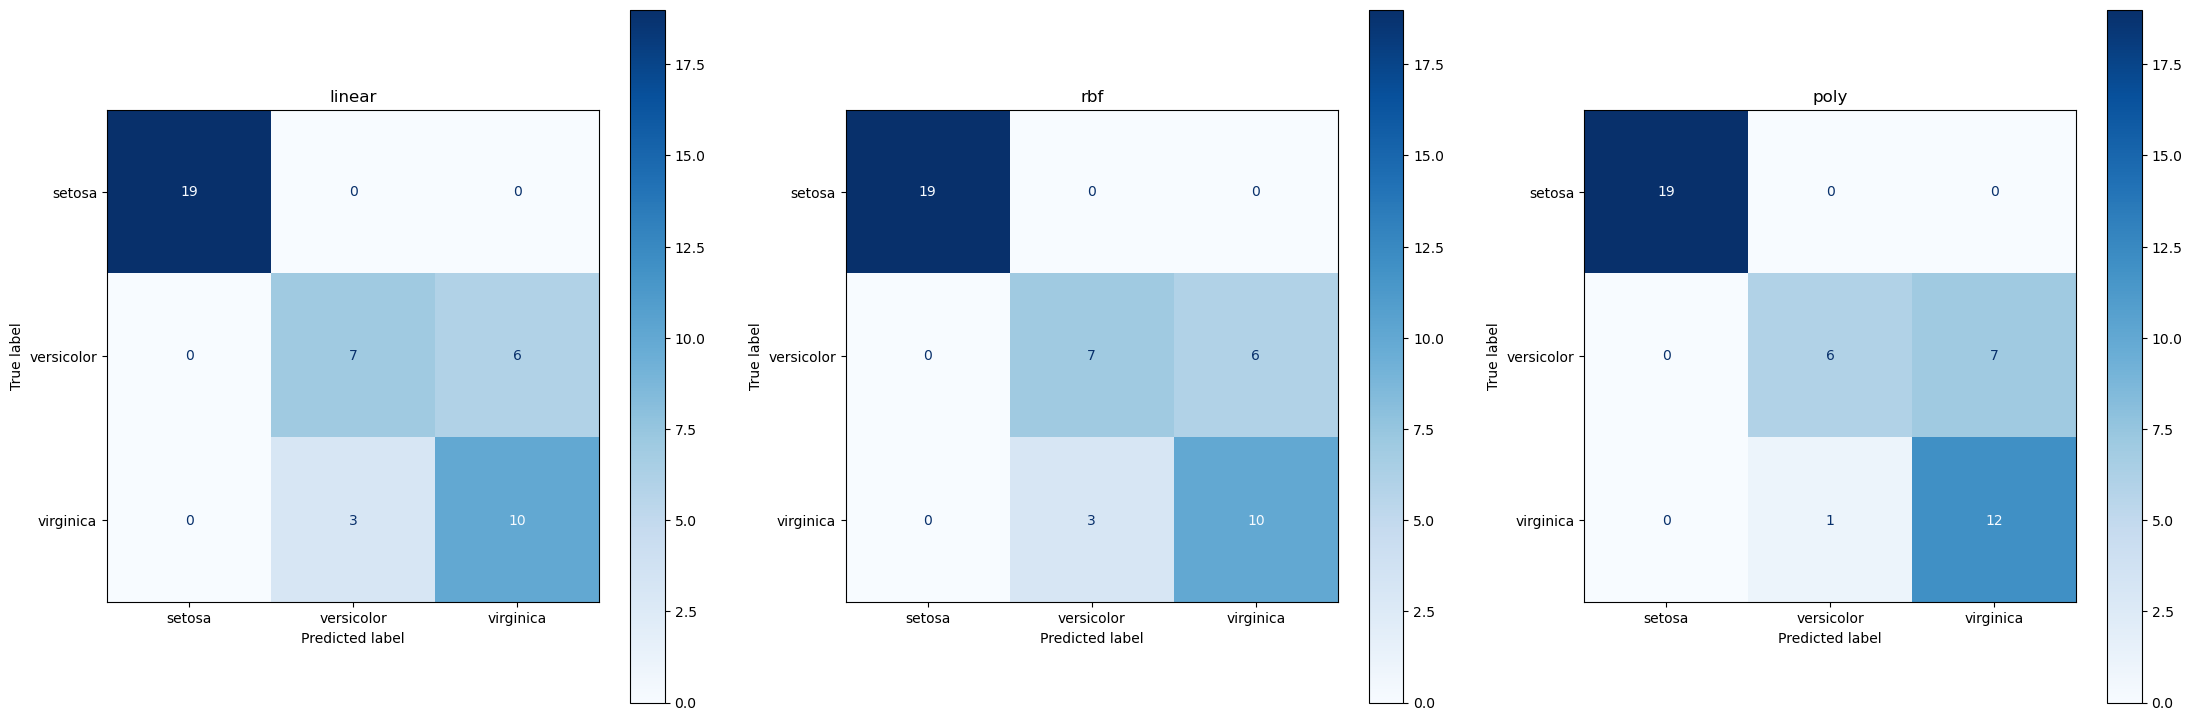

In [7]:
# Load Python packages for Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt  
fig,axes = plt.subplots(1,3,figsize = (27,9))
for (kernel,clf,ax) in zip(("linear", "rbf", "poly"),models,axes.flatten()):
    _ = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=ax, display_labels=iris.target_names,
                                              cmap='Blues')
    ax.set_title(kernel)
plt.show()


### 3.2 Plot the decision surface for SVM classifiers with different kernels.
Fill in the blanks.

In [8]:
# Load Python packages
from sklearn.inspection import DecisionBoundaryDisplay

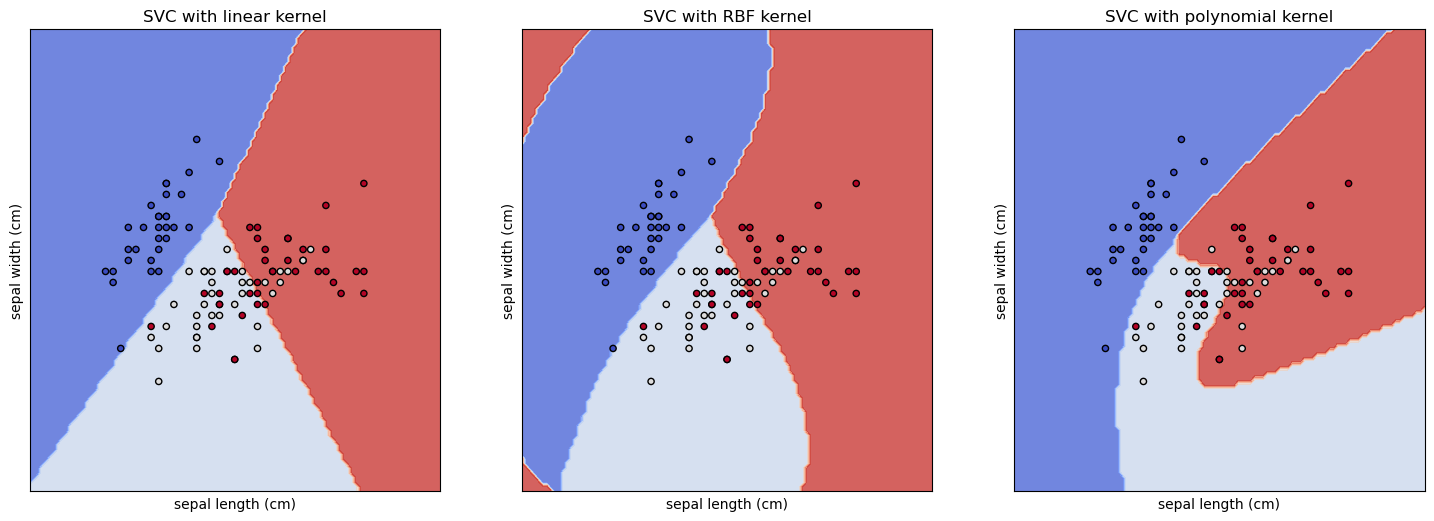

In [9]:
# title for the plots
titles = (
    "SVC with linear kernel",
    "SVC with RBF kernel",
    "SVC with polynomial kernel",
)

fig, sub = plt.subplots(1, 3,figsize=(18,6))

X0, X1 = X_train[:, 0], X_train[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    scatter = ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()
